<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[colab](https://colab.research.google.com/drive/163C85NuF09HQWujN3IP22zahZhSsYLNI)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns
from collections import namedtuple
from scipy.stats import norm
plt.style.use('fivethirtyeight')

||replacements|w/o replacements|
|-|:-:|:-:|
|**Combinations**<br>(order does not matter)|$$\binom{k+n-1}{k}=\frac{(k+n-1)!}{k!(n-1)!}$$|$$\binom{n}{k}=\frac{n!}{k!(n-k)!}$$|
|**Permutations**<br>(order matters)|$$n^k$$|$$\frac{n!}{(n-k)!}$$|

||pars|&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PMF/PDF &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|mean|var|med|comments|
|-|:-:|:-:|:-:|:-:|:-:|:-:|
|**Bernoulli**|$$p$$|$$\begin{cases} P(X=0)=q=(1-p) \\ P(X=1)=p \end{cases}$$|$$p$$|$$p  (1-p)$$||boolean-valued outcome|
|**Grometric**|$$p$$|$$P(X=k)=(1-p)^{k-1}p$$|$$\frac{1}{p}$$|$$\frac{1-p}{p^2}$$||# of first success|
|**Binomial**|$$n, p$$|$$P(X=k)=\binom{n}{k}p^k(1-p)^{n-k}$$|$$np$$|$$np(1-p)$$||# successes drawn with replacement|
|**Poisson**|$$\lambda$$|$$P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!}$$|$$\lambda$$|$$\lambda$$|| # emails/calls per time period|
|**Exponential**|$$\lambda$$|$$f(x \mid \lambda)=\lambda e^{-\lambda x}$$|$$\frac{1}{\lambda}$$|$$\frac{1}{\lambda^2}$$|$$\frac{\ln{2}}{\lambda}$$|time between events|
|**Normal**|$$\mu, \sigma^2$$|$$f(x \mid \mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$|$$\mu$$|$$\sigma^2$$|$$\mu$$|measurement errors


||||comments|
|-:|:-:|:-:|:-:|
|**Law or Large Numbers**|$$\bar{X}_n \xrightarrow{\text{a.s.}} \mu$$||converges strongly<br>**almost surely**<br>**almost everywhere**<br>**with probability 1**|
|**Central Limit Theorem**|$$\bar{X}_n \xrightarrow{\text{d}} N\Bigl(\mu, \frac{\sigma^2}{n}\Bigr)$$|$$\sqrt{n}\frac{\bar{X}_n-\mu}{\sigma} \xrightarrow{\text{d}} N(0,1)$$|converges weakly<br>**in distribution**|

||$$\textbf{Pred NO}$$<br>$$\text{TN}+\text{FN}$$<br>$$P(\bar{B})$$|$$\textbf{Pred YES}$$<br>$$\text{FP}+\text{TP}$$<br>$$\text{Evidence}=P(B)$$|$$\text{ROC(th)}=\frac{\text{TPR(th)}}{\text{FPR(th)}}$$|
|:-:|:-:|:-:|:-:|
|$$\textbf{Actual NO}$$<BR>$$\text{TN}+\text{FP}$$<BR>$$P(\bar{A})$$|$$\textbf{TN}$$<br>$$\text{Confidence}$$<BR>$$c=1-\alpha$$|$$\textbf{FP}$$<br>$$\text{Type I}$$<br>$$\alpha$$|$$\text{Fall out (FPR)}=\frac{\text{FP}}{\text{FP}+\text{TN}}$$|
|$$\textbf{Actual YES}$$<BR>$$\text{FN}+\text{TP}$$<br>$$\text{Prior}=P(A)$$|$$\textbf{FN}$$<br>$$\text{Type II}$$<br>$$\beta$$|$$\textbf{TP}$$<br>$$\text{Power}$$<br>$$p=1-\beta$$|$$\text{Recall (Sensitivity, TPR)}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$<BR>$$\text{Likelihood}=P(B \mid A)$$|
|||$$\text{Precision}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$<br>$$P(A\mid B)=\frac{P(B \mid A) \cdot P(A)}{P(B)}$$<BR>$$\text{Posterior}=\frac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}}$$|$$F_1=2\cdot\frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$|

||means|proportions|comments
|:-|:-:|:-:|:-:|
|$$x$$|$$n \times D(\mu, \sigma^2)$$|$$n \times \text{Bernouli}(p)$$|
|$$\mu$$|$$N\Bigl(\mu, \frac{\sigma^2}{n}\Bigr)$$|$$\frac{\text{Binomial}(n, p)}{n}$$|
|$$\textbf{SE}$$|$$\sqrt{\frac{\sigma^2_t}{n_t}+\frac{\sigma^2_c}{n_c}}$$|$$\sqrt{\hat{p}(1-\hat{p})\Bigl(\frac{1}{n_t}+\frac{1}{n_c}\Bigr)}$$||
|$$\Delta$$|$$\mu_t-\mu_c$$|$$p_t-p_c$$||
|$$z$$|$$\frac{\Delta}{\text{SE}} \sim N\Bigl(\frac{\Delta}{\text{SE}}, 1\Bigr)$$|$$\frac{\Delta}{\text{SE}} \sim N\Bigl(\frac{\Delta}{\text{SE}}, 1\Bigr)$$||
|$$\textbf{CI}$$|$$\Delta \pm z_{\alpha/2}\text{SE}$$|$$\Delta \pm z_{\alpha/2} \cdot \text{SE}$$|`scipy.stats.norm.ppf`<br>Percent point function<br>Inverse CDF|
|$$\textbf{p_val}$$|$$2\cdot P(N \ge \lvert z\rvert)$$|$$2\cdot P(N \ge \lvert z\rvert)$$|`scipy.stats.norm.sf`<br>Survival function<br>1 – CDF|
|$$\textbf{MDE}$$|$$(z_{1-\alpha/2} + z_{1-\beta})\cdot \text{SE}$$|$$(z_{1-\alpha/2} + z_{1-\beta})\cdot \text{SE}$$|$$\Delta$$|
|$$n$$|$$\frac{\sigma^2_t(1-t)+\sigma^2_ct}{t(1-t)}\cdot \Bigl(\frac{z_{1-\alpha/2} + z_{1-\beta}}{p_t-p_c}\Bigr)^2$$|$$\frac{p(1-p)}{t(1-t)}\cdot \Bigl(\frac{z_{1-\alpha/2} + z_{1-\beta}}{p_t-p_c}\Bigr)^2$$|$$(z_{1-\alpha/2} + z_{1-\beta})\cdot \text{SE} \le \Delta$$|


,n_t,p_t,n_c,p_c,p,se,z,p_val,sig,test
0,11621,0.100594,11621,0.098701,0.099647,0.003929,0.481778,0.629964,False,=
1,11621,0.105241,11621,0.099045,0.102143,0.003973,1.559511,0.118875,False,=


test,<,=,>
sig,,,
False,0,9019,0
True,505,0,476


,n_t,p_t,n_c,p_c,p,se,z,p_val,sig,test
0,11621,0.105671,11621,0.100680,0.103175,0.003991,1.250690,0.211048,False,=
1,11621,0.107822,11621,0.101024,0.104423,0.004012,1.694497,0.090171,True,>


test,<,=,>
sig,,,
False,0,1992,0
True,1,0,8007


array([[9019,  981],
       [1992, 8008]])

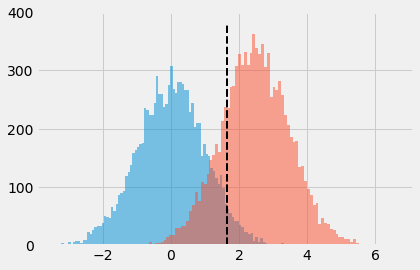

In [2]:
def get_sizes(p_t, p_c, t, conf, power):
    p = p_t * t + p_c * (1 - t)
    n = p * (1 - p) / t / (1 - t)
    n *= (norm.ppf([1 - (1 - conf) / 2, power]).sum() / (p_t - p_c)) ** 2
    return np.ceil([n * t, n * (1 - t)]).astype(int)

def generate_prop(p, n_samples, n_experiments):
    x = np.random.binomial(n_samples, p, n_experiments)
    return x / n_samples

def ptt(p_t, p_c, n_t, n_c, conf, s=10_000):
    p_t = generate_prop(p_t, n_t, s)
    p_c = generate_prop(p_c, n_c, s)
    p = (p_t * n_t + p_c * n_c) / (n_t + n_c)
    se = np.sqrt(p * (1 - p) * (1 / n_t + 1 / n_c))
    z = (p_t - p_c) / se
    p_val = norm.sf(np.abs(z)) * 2
    alpha = 1 - conf
    df = pd.DataFrame({
        'n_t': n_t, 'p_t': p_t, 'n_c': n_c, 'p_c': p_c, 
        'p': p, 'se': se, 'z': z, 
        'p_val': p_val, 'sig': p_val < alpha, 'test': '='
    })
    df.loc[p_t - p_c + se * norm.ppf(1 - alpha / 2) < 0, 'test'] = '<'
    df.loc[p_t - p_c + se * norm.ppf(alpha / 2) > 0, 'test'] = '>'
    display(df.head(2))
    display(df.pivot_table('p_val', 'sig', 'test', 'count', 0))
    ax = df['z'].hist(bins=100, alpha=0.5)
    plt.vlines(norm.ppf(1 - alpha / 2), *ax.get_ylim(), ls='--', lw=2)
    return (p_val > alpha).sum(), (p_val < alpha).sum()

def run_tests(p_t, p_c, t, conf, power):
    n_t, n_c = get_sizes(p_t, p_c, t, conf, power)
    cm = np.array([ptt(p_c, p_c, n_t, n_c, conf), ptt(p_t, p_c, n_t, n_c, conf)])
    return cm

run_tests(p_t=0.11, p_c=0.1, t=0.5, conf=.9, power=.8)

3092 12366


,n_t,mu_t,std_t,n_c,mu_c,std_c,se,z,p_val,sig,test
0,3092,100.123115,20.049124,12366,99.996939,20.134279,0.403466,0.312731,0.754485,False,=
1,3092,99.860223,20.126828,12366,100.010078,19.983445,0.404110,-0.370828,0.710766,False,=


test,<,=,>
sig,,,
False,0,9006,0
True,505,0,489


,n_t,mu_t,std_t,n_c,mu_c,std_c,se,z,p_val,sig,test
0,3092,101.086143,20.290924,12366,100.114629,19.867151,0.406295,2.391156,0.016795,True,>
1,3092,101.189625,20.139779,12366,100.146931,20.001665,0.404392,2.578423,0.009925,True,>


test,=,>
sig,,
False,2011,0
True,0,7989


array([[9006,  994],
       [2011, 7989]])

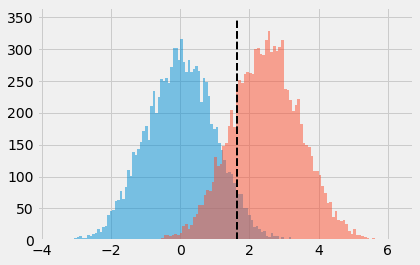

In [3]:
def get_sizes(mu_t, mu_c, std_t, std_c, t, conf, power):
    n = (std_t ** 2 * (1 - t) + std_c ** 2 * t) / t / (1 - t)
    n *= (norm.ppf([1 - (1 - conf) / 2, power]).sum() / (mu_t - mu_c)) ** 2
    return np.ceil([n * t, n * (1 - t)]).astype(int)

def generate_mean(mu, std, n_samples, n_experiments):
    x = np.random.normal(mu, std, (n_experiments, n_samples))
    return x.mean(axis=1), x.std(axis=1)

def mtt(mu_t, mu_c, std_t, std_c, n_t, n_c, conf, s=10_000):
    mu_t, std_t = generate_mean(mu_t, std_t, n_t, s)
    mu_c, std_c = generate_mean(mu_c, std_c, n_c, s)
    se = np.sqrt(std_t ** 2 / n_t + std_c ** 2 / n_c)
    z = (mu_t - mu_c) / se
    p_val = norm.sf(np.abs(z)) * 2
    alpha = 1 - conf
    df = pd.DataFrame({
        'n_t': n_t, 'mu_t': mu_t, 'std_t': std_t, 'n_c': n_c, 'mu_c': mu_c, 'std_c': std_c, 
        'se': se, 'z': z, 
        'p_val': p_val, 'sig': p_val < alpha, 'test': '='
    })
    df.loc[mu_t - mu_c + se * norm.ppf(1 - alpha / 2) < 0, 'test'] = '<'
    df.loc[mu_t - mu_c + se * norm.ppf(alpha / 2) > 0, 'test'] = '>'
    display(df.head(2))
    display(df.pivot_table('p_val', 'sig', 'test', 'count', 0))
    ax = df['z'].hist(bins=100, alpha=0.5)
    plt.vlines(norm.ppf(1 - alpha / 2), *ax.get_ylim(), ls='--', lw=2)
    return (p_val > alpha).sum(), (p_val < alpha).sum()

def run_tests(mu_t, mu_c, std_t, std_c, t, conf, power):
    n_t, n_c = get_sizes(mu_t, mu_c, std_t, std_c, t, conf, power)
    print(n_t, n_c)
    cm = np.array([mtt(mu_c, mu_c, std_c, std_c, n_t, n_c, conf), 
                   mtt(mu_t, mu_c, std_t, std_c, n_t, n_c, conf)])
    return cm

run_tests(mu_t=101, mu_c=100, std_t=20, std_c=20, t=0.2, conf=.9, power=.8)